# P9.2
 Determine numerically (looking for the eigenvector) values of
ergodic density for the random walk on selected network. [1P]

In [2]:
import numpy as np
import networkx as nx

G = nx.karate_club_graph()

A = nx.to_numpy_array(G, dtype=float)

n = A.shape[0]
k = A.sum(axis=1)

P = np.zeros((n, n), dtype=float)
for i in range(n):
    if k[i] > 0:
        P[:, i] = A[i, :] / k[i]
    else:
        P[i, i] = 1.0

vals, vecs = np.linalg.eig(P)
idx = np.argmin(np.abs(vals - 1))
q = np.real(vecs[:, idx])

q = np.abs(q)
q = q / q.sum()

print("Ergodic density q (first 10 entries):", q[:10])
print("Sum:", q.sum())


Ergodic density q (first 10 entries): [0.09090909 0.06277056 0.07142857 0.03896104 0.01731602 0.03030303
 0.02813853 0.02813853 0.03679654 0.00649351]
Sum: 1.0


# P9.3
Determine dynamically (by iterating the Markov operator)
ergodic density for the random walk on selected network. [1P]


In [3]:
import numpy as np
import networkx as nx

G = nx.karate_club_graph()

A = nx.to_numpy_array(G, dtype=float)
n = A.shape[0]
k = A.sum(axis=1)

P = np.zeros((n, n), dtype=float)
for i in range(n):
    if k[i] > 0:
        P[:, i] = A[i, :] / k[i]
    else:
        P[i, i] = 1.0

q = np.ones(n) / n
eps = 1e-12
max_iter = 100000

for t in range(max_iter):
    q_next = P @ q
    if np.linalg.norm(q_next - q, 1) < eps:
        q = q_next
        break
    q = q_next

q = q / q.sum()
print("Converged in iterations:", t + 1)
print("Ergodic density q (first 10):", q[:10])
print("Sum:", q.sum())


Converged in iterations: 195
Ergodic density q (first 10): [0.09090909 0.06277056 0.07142857 0.03896104 0.01731602 0.03030303
 0.02813853 0.02813853 0.03679654 0.00649351]
Sum: 1.0


#  P9.5
 Determine the value of classic or modified pagerank for the
selected network. [1.5P]


In [4]:
import networkx as nx

G = nx.karate_club_graph()

alpha = 0.85

pr = nx.pagerank(G, alpha=alpha)

# Print top 10
top10 = sorted(pr.items(), key=lambda x: x[1], reverse=True)[:10]
print("Classic PageRank (top 10):")
for node, score in top10:
    print(node, score)

personalization = {u: 0.0 for u in G.nodes()}
personalization[0] = 1.0

ppr = nx.pagerank(G, alpha=alpha, personalization=personalization)

top10_p = sorted(ppr.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nPersonalized PageRank toward node 0 (top 10):")
for node, score in top10_p:
    print(node, score)


Classic PageRank (top 10):
33 0.09698041880501741
0 0.08850807396280012
32 0.07592643687005646
2 0.06276686454603017
1 0.057414840497110056
31 0.04198548926127872
23 0.04114596964602211
3 0.03721208153631377
5 0.03381044255357727
13 0.033474187085322404

Personalized PageRank toward node 0 (top 10):
0 0.2586814904840389
1 0.07618884833001639
2 0.07488591193830409
3 0.048920593377997826
5 0.04621087522084753
33 0.04481187648466366
6 0.043409925083705274
13 0.041968624699790465
7 0.03404846944645621
32 0.032106128359325144


# P9.6
 Find a graph with a fixed number of edges and vertices where
diffusion occurs fastest (hint: value a second eigenvalue can
help). [3.5P]


Fixed n=20, fixed m=40 (d=4-regular). Trials=300
Smallest lambda2(lazy) found: 0.8073938898041554
lambda2(lazy) cycle: 0.9755282581475768
lambda2(lazy) path : 0.9931806517013614
lambda2(lazy) star : 0.5000000000000002


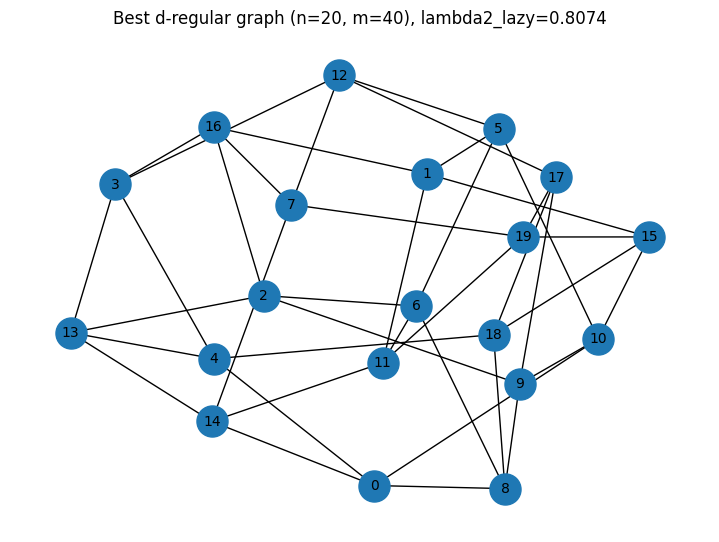

In [7]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def lambda2_lazy(G):
    A = nx.to_numpy_array(G, dtype=float)
    n = A.shape[0]
    k = A.sum(axis=1)

    P = np.zeros((n, n))
    for i in range(n):
        if k[i] > 0:
            P[:, i] = A[i, :] / k[i]
        else:
            P[i, i] = 1.0

    P_lazy = 0.5 * (np.eye(n) + P)
    vals = np.linalg.eigvals(P_lazy)
    vals = np.sort(np.real(vals))[::-1]
    return vals[1]

n = 20
d = 4
m = n * d // 2
trials = 300

best_l2 = 1e9
best_G = None

for _ in range(trials):
    G = nx.random_regular_graph(d, n)
    l2 = lambda2_lazy(G)
    if l2 < best_l2:
        best_l2 = l2
        best_G = G

print(f"Fixed n={n}, fixed m={m} (d={d}-regular). Trials={trials}")
print("Smallest lambda2(lazy) found:", best_l2)

G_cycle = nx.cycle_graph(n)
G_path = nx.path_graph(n)
G_star = nx.star_graph(n-1)

print("lambda2(lazy) cycle:", lambda2_lazy(G_cycle))
print("lambda2(lazy) path :", lambda2_lazy(G_path))
print("lambda2(lazy) star :", lambda2_lazy(G_star))

plt.figure(figsize=(7, 5))
pos = nx.spring_layout(best_G, seed=42)
nx.draw(best_G, pos, with_labels=True, node_size=500, font_size=10)
plt.title(f"Best d-regular graph (n={n}, m={m}), lambda2_lazy={best_l2:.4f}")
plt.show()
